In [1]:
import numpy as np
from chainconsumer import ChainConsumer
from sbi_lens.config import config_lsst_y_10
import matplotlib.pyplot as plt

## Load data

In [2]:
import pickle
with open("/gpfsdswork/projects/rech/eqw/ufa23yn/dev/lensing_project/Denise_project/plots/sample_nd_mse.pkl", 'rb') as g:
    sample_nd_mse = pickle.load(g)
    
with open("/gpfsdswork/projects/rech/eqw/ufa23yn/dev/lensing_project/Denise_project/plots/sample_nd_vmim.pkl", 'rb') as g:
    sample_nd_vmim = pickle.load(g)
    
with open("/gpfsdswork/projects/rech/eqw/ufa23yn/dev/lensing_project/Denise_project/plots/sample_nd_mae.pkl", 'rb') as g:
    sample_nd_mae = pickle.load(g) 

with open("/gpfsdswork/projects/rech/eqw/ufa23yn/dev/lensing_project/Denise_project/plots/sample_nd_gnll.pkl", 'rb') as g:
    sample_nd_gnll = pickle.load(g) 

with open("/gpfsdswork/projects/rech/eqw/ufa23yn/dev/lensing_project/Denise_project/plots/sample_nd_gnll.pkl", 'rb') as g:
    sample_nd_gnll = pickle.load(g) 

sample_ff=np.load("/gpfsdswork/projects/rech/eqw/ufa23yn/dev/lensing_project/Denise_project/plots/posterior_full_field__256N_10ms_27gpa_0.26se.npy",allow_pickle=True)
sample_ps=np.load("/gpfsdswork/projects/rech/eqw/ufa23yn/dev/lensing_project/Denise_project/plots/posterior_power_spectrum__256N_10ms_27gpa_0.26se.npy",allow_pickle=True)
sample_ps_fixed_cov = np.load('/gpfsdswork/projects/rech/eqw/ufa23yn/dev/lensing_project/Denise_project/hmc/posterior_power_spectrum__256N_10ms_27gpa_0.26se.npy')

2024-06-29 11:13:30.427891: W external/org_tensorflow/tensorflow/tsl/platform/default/dso_loader.cc:66] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /gpfslocalsup/spack_soft/sox/14.4.2/gcc-8.4.1-egb3ni235l3f4q4lxbo3gfqgws6fdecl/lib:/gpfslocalsup/spack_soft/openmpi/4.1.1/gcc-8.5.0-mbafzinnzpvx22cqojowmnmatg2po2aw/lib:/gpfslocalsup/spack_soft/gcc/8.5.0/gcc-11.3.1-kscbdhy5tas2syvclsyjgg2kmqhusdeu/lib64:/gpfslocalsup/spack_soft/gcc/8.5.0/gcc-11.3.1-kscbdhy5tas2syvclsyjgg2kmqhusdeu/lib:/gpfslocalsup/spack_soft/cudnn/8.1.1.33-11.2/gcc-8.3.1-dgsfwc7e23vzc36jopc5nxyunptm2ieh/lib64:/gpfslocalsup/spack_soft/nccl/2.9.6-1/gcc-8.3.1-2c3rwcolksekujszxrg7r72uxmekxx2y/lib:/gpfslocalsys/cuda/11.2/nvvm/lib64:/gpfslocalsys/cuda/11.2/extras/CUPTI/lib64:/gpfslocalsys/cuda/11.2/lib64:/gpfslocalsys/cuda/11.2/samples/common/lib/linux/x86_64:/gpfslocalsys/cuda/11.2/targets/x86_64-linux/lib:/gpfslocalsys/slurm/c

In [3]:
plt.rcParams["figure.figsize"] = (15,8)
plt.rcParams["lines.linewidth"] = 1
plt.rcParams['lines.markersize'] = 3

color = [
    '#f8c471',
    '#d68910',
    '#cd6155',
    '#edbb99',
    '#5d6d7e',
    '#73c6b6',
    '#a3b899'
]

truth = config_lsst_y_10.truth
params_name = config_lsst_y_10.params_name_latex

# Optimal Neural Summarisation for Full-Field Weak Lensing Cosmological Implicit Inference plots

In [21]:
from getdist import plots, MCSamples
import getdist


color = ['#77aabb', '#8fb4b8', '#a7beb4', '#bec9b1', '#d6d3ad', '#eeddaa']

g = plots.get_subplot_plotter(width_inch=7, scaling=False)
g.settings.figure_legend_frame = False
g.settings.alpha_filled_add=0.5
g.settings.title_limit_fontsize = 14

params_name = ['omegac', 'omegab', 'sigma8', 'h0', 'ns', 'w0']
param_labels = [r'\Omega_c', r'\Omega_b', r'\sigma_8', r'h_0', r'n_s', r'w_0']

# Create the MCSamples objects with the labels
samples = MCSamples(samples=sample_nd_mae, names=params_name, labels=param_labels)
samples2 = MCSamples(samples=sample_nd_mse, names=params_name, labels=param_labels)
samples3 = MCSamples(samples=sample_nd_vmim, names=params_name, labels=param_labels)
# Modify settings to deactivate smoothing

g.triangle_plot(
    [samples, samples2, samples3],
    params=params_name,# Add parameter names here
    filled=[True, False, False],
    legend_labels=['Compression with MAE', 'Compression with MSE','Compression with VMIM', ], 
    legend_loc='upper right',
    line_args=[{'lw':2, 'color': '#77aabb',},
               {'lw':2, 'color':'#F7DC6F'},
               {'lw':2, 'color': '#1B2631'},],
    contour_colors=['#77aabb', '#F7DC6F', '#1B2631',],
    contour_args=[{'lw':2, },{'lw':2}, {'lw':2, 'ls':'--'}],
    param_limits={
        'omegac': (truth[0] - 5 * np.std(sample_ff[:,0]), truth[0] + 5 * np.std(sample_ff[:,0]),), 
        'omegab': (truth[1] - 5 * np.std(sample_ff[:,1]), truth[1] + 5 * np.std(sample_ff[:,1]),), 
        'sigma8':(truth[2] - 5 * np.std(sample_ff[:,2]), truth[2] + 5 * np.std(sample_ff[:,2]),), 
        'h0':(truth[3] - 5 * np.std(sample_ff[:,3]), truth[3] + 5 * np.std(sample_ff[:,3]),), 
        'ns':(truth[4] - 5 * np.std(sample_ff[:,4]), truth[4] + 5 * np.std(sample_ff[:,4]),), 
        'w0':(truth[5] - 5 * np.std(sample_ff[:,5]), truth[5] + 5 * np.std(sample_ff[:,5]),), 
    }, 
    markers = truth,
)
g.export(f'contour_plot_compression.pdf')

Removed no burn in
Removed no burn in
Removed no burn in


In [22]:
from getdist import plots, MCSamples
import getdist


color = ['#77aabb', '#8fb4b8', '#a7beb4', '#bec9b1', '#d6d3ad', '#F7DC6F']


g = plots.get_subplot_plotter(width_inch=7, scaling=False)
g.settings.figure_legend_frame = False
g.settings.alpha_filled_add=0.7
g.settings.title_limit_fontsize = 14

params_name = ['omegac', 'omegab', 'sigma8', 'h0', 'ns', 'w0']
param_labels = [r'\Omega_c', r'\Omega_b', r'\sigma_8', r'h_0', r'n_s', r'w_0']

# Create the MCSamples objects with the labels
samples = MCSamples(samples=sample_ps_fixed_cov, names=params_name, labels=param_labels)
samples2 = MCSamples(samples=sample_ff, names=params_name, labels=param_labels)
samples3 = MCSamples(samples=sample_nd_vmim, names=params_name, labels=param_labels)
# Modify settings to deactivate smoothing

g.triangle_plot(
    [samples, samples2, samples3],
    params=params_name,# Add parameter names here
    filled=[True, True, False],
    legend_labels=['Explicit Inference - Power Spectrum', 'Explicit Inference - Full-field','Implicit Inference (VMIM) - Full-field', ], 
    legend_loc='upper right',
    line_args=[{'lw':2, 'color': color[0],},
               {'lw':2, 'color':color[-1]},
               {'lw':2, 'color': '#1B2631'},],
    contour_colors=[color[0], color[-1], '#1B2631',],
    contour_args=[{'lw':2, },{'lw':2}, {'lw':2, 'ls':'--'}],
    param_limits={
        'omegac': (truth[0] - 5 * np.std(sample_ff[:,0]), truth[0] + 5 * np.std(sample_ff[:,0]),), 
        'omegab': (truth[1] - 5 * np.std(sample_ff[:,1]), truth[1] + 5 * np.std(sample_ff[:,1]),), 
        'sigma8':(truth[2] - 5 * np.std(sample_ff[:,2]), truth[2] + 5 * np.std(sample_ff[:,2]),), 
        'h0':(truth[3] - 5 * np.std(sample_ff[:,3]), truth[3] + 5 * np.std(sample_ff[:,3]),), 
        'ns':(truth[4] - 5 * np.std(sample_ff[:,4]), truth[4] + 5 * np.std(sample_ff[:,4]),), 
        'w0':(truth[5] - 5 * np.std(sample_ff[:,5]), truth[5] + 5 * np.std(sample_ff[:,5]),), 
    }, 
    markers = truth,
)
g.export(f'contours_posterior_imp_ex_ps.pdf')

Removed no burn in
Removed no burn in
Removed no burn in


In [23]:
from getdist import plots, MCSamples
import getdist


color = ['#77aabb', '#8fb4b8', '#a7beb4', '#bec9b1', '#d6d3ad', '#eeddaa']

g = plots.get_subplot_plotter(width_inch=7, scaling=False)
g.settings.figure_legend_frame = False
g.settings.alpha_filled_add=1
g.settings.title_limit_fontsize = 14

params_name = ['omegac', 'omegab', 'sigma8', 'h0', 'ns', 'w0']
param_labels = [r'\Omega_c', r'\Omega_b', r'\sigma_8', r'h_0', r'n_s', r'w_0']

# Create the MCSamples objects with the labels
samples = MCSamples(samples=sample_nd_mse, names=params_name, labels=param_labels)
samples2 = MCSamples(samples=sample_nd_gnll, names=params_name, labels=param_labels)
# Modify settings to deactivate smoothing

g.triangle_plot(
    [samples, samples2],
    params=params_name,# Add parameter names here
    filled=[False, True],
    legend_labels=['Compression with MSE','Compression with GNLL', ], 
    legend_loc='upper right',
    line_args=[{'lw':2, 'color': '#F7DC6F',},
               {'lw':2, 'color':'#8fb4b8'},],
    contour_colors=['#F7DC6F', '#8fb4b8'],
    contour_args=[{'lw':2, },{'lw':2}],#'ls':'--', 
    markers = truth,
    param_limits={
        'omegac': (truth[0] - 5 * np.std(sample_ff[:,0]), truth[0] + 5 * np.std(sample_ff[:,0]),), 
        'omegab': (truth[1] - 5 * np.std(sample_ff[:,1]), truth[1] + 5 * np.std(sample_ff[:,1]),), 
        'sigma8':(truth[2] - 5 * np.std(sample_ff[:,2]), truth[2] + 5 * np.std(sample_ff[:,2]),), 
        'h0':(truth[3] - 5 * np.std(sample_ff[:,3]), truth[3] + 5 * np.std(sample_ff[:,3]),), 
        'ns':(truth[4] - 5 * np.std(sample_ff[:,4]), truth[4] + 5 * np.std(sample_ff[:,4]),), 
        'w0':(truth[5] - 5 * np.std(sample_ff[:,5]), truth[5] + 5 * np.std(sample_ff[:,5]),), 
    },
)
g.export(f'contour_plot_compression_with_gnll.pdf')

Removed no burn in
Removed no burn in


# checking new ps constraints

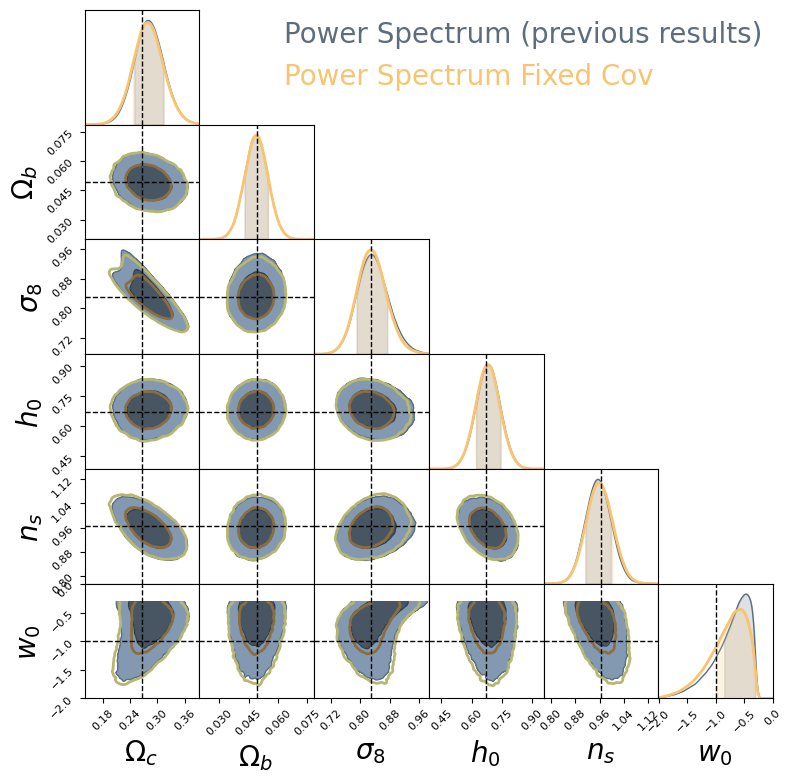

In [4]:
c = ChainConsumer()

c.add_chain(
        sample_ps,
        parameters=params_name,
        name='Power Spectrum (previous results)',
        linewidth=1,
        color =  color[4], 
        shade_alpha = 1
)

c.add_chain(
        sample_ps_fixed_cov,
        parameters=params_name,
        name='Power Spectrum Fixed Cov',
        linewidth=2,
        color = color[0],
        shade_alpha = 0., 
        # linestyle = '--'
)

c.configure(legend_kwargs={"fontsize": 20}, tick_font_size=8, label_font_size=20)
fig = c.plotter.plot(
    figsize=0.9,
    truth=truth,
    extents=[[t - 5 * np.std(sample_ff[:,i]),
              t + 5 * np.std(sample_ff[:,i])] for i,t in enumerate(truth)]
)

plt.savefig('contour_plot_sbi_lens.png')

# plots for talks

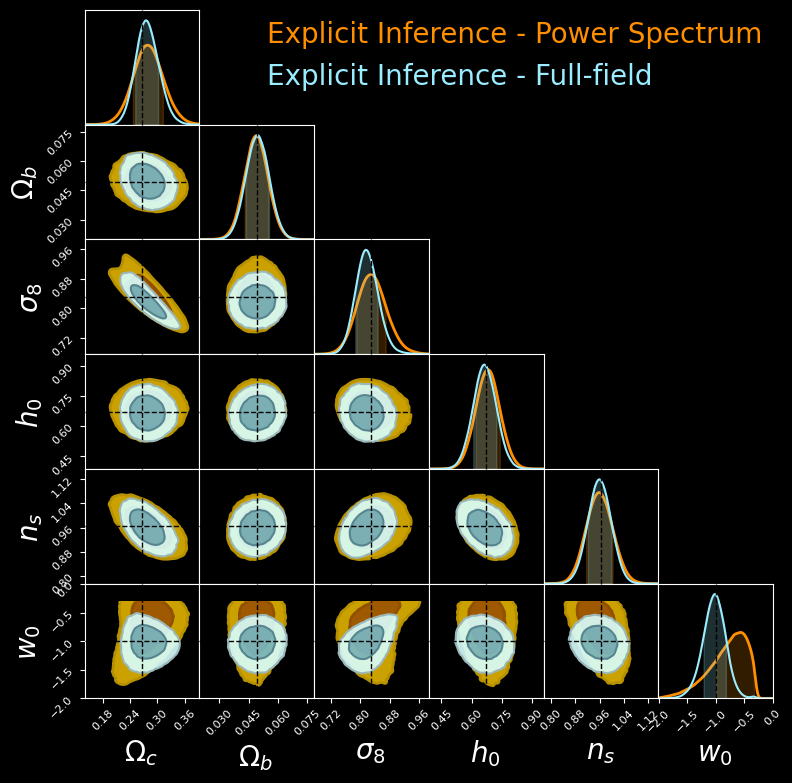

In [6]:
plt.style.use("dark_background")

c = ChainConsumer()

c.add_chain(
        sample_ps_fixed_cov,
        parameters=params_name,
        name='Explicit Inference - Power Spectrum',
        linewidth=2,
        color =  "#FF8F00", #"#111111",
        shade_alpha = 0.8
)

c.add_chain(
        sample_ff,
        parameters=params_name,
        name='Explicit Inference - Full-field',
        linewidth=1.5,
        color = "#9AECFF",
        shade_alpha = 0.9
)


c.configure(legend_kwargs={"fontsize": 20}, tick_font_size=8, label_font_size=20)
fig = c.plotter.plot(
    figsize=0.9,
    truth=truth,
    extents=[[t - 5 * np.std(sample_ff[:,i]),
              t + 5 * np.std(sample_ff[:,i])] for i,t in enumerate(truth)]
)
# plt.tight_figure()
# plt.savefig('contour_plot_sbi_lens.pdf')
plt.savefig('contour_plot_sbi_lens.png', transparent = True)

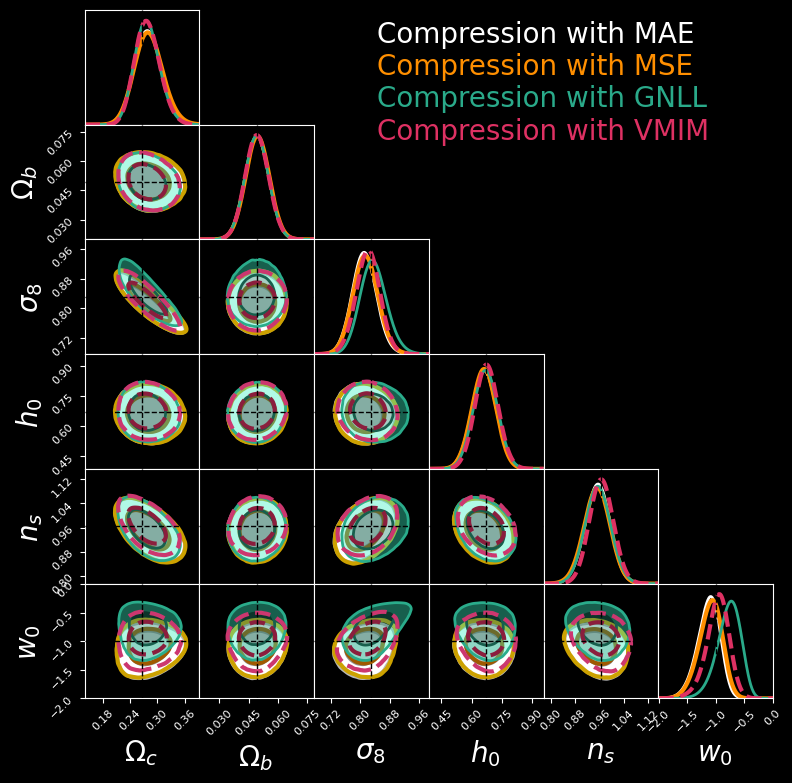

In [9]:
plt.style.use("dark_background")
c = ChainConsumer()


c.add_chain(
        sample_nd_mae,
        parameters=params_name,
        name='Compression with MAE       ',
        linewidth=2,
        color =  "#ffffff", 
        shade=True,
        shade_alpha = 1, 
        # linestyle='--'
)

c.add_chain(
        sample_nd_mse,
        parameters=params_name,
        name='Compression with MSE       ',
        linewidth=3,
        color = "#FF8F00",
        shade=False,
        shade_alpha = 1
)


c.add_chain(
        sample_nd_gnll,
        parameters=params_name,
        name='Compression with GNLL      ',
        linewidth=2,
        color =  "#2AAA8A",
        shade=True,
        shade_alpha = 0.4, 
)

c.add_chain(
        sample_nd_vmim,
        parameters=params_name,
        name='Compression with VMIM      ',
        linewidth=3,
        color =  "#DE3163",
        shade = False,
        linestyle = '--'
)


c.configure(legend_kwargs={"fontsize": 20}, tick_font_size=8, label_font_size=20)
fig = c.plotter.plot(
    figsize=0.9,
    truth=truth,
    extents=[[t - 5 * np.std(sample_ff[:,i]),
              t + 5 * np.std(sample_ff[:,i])] for i,t in enumerate(truth)]
)

plt.savefig('contour_plot_compression_1.png', transparent= True)

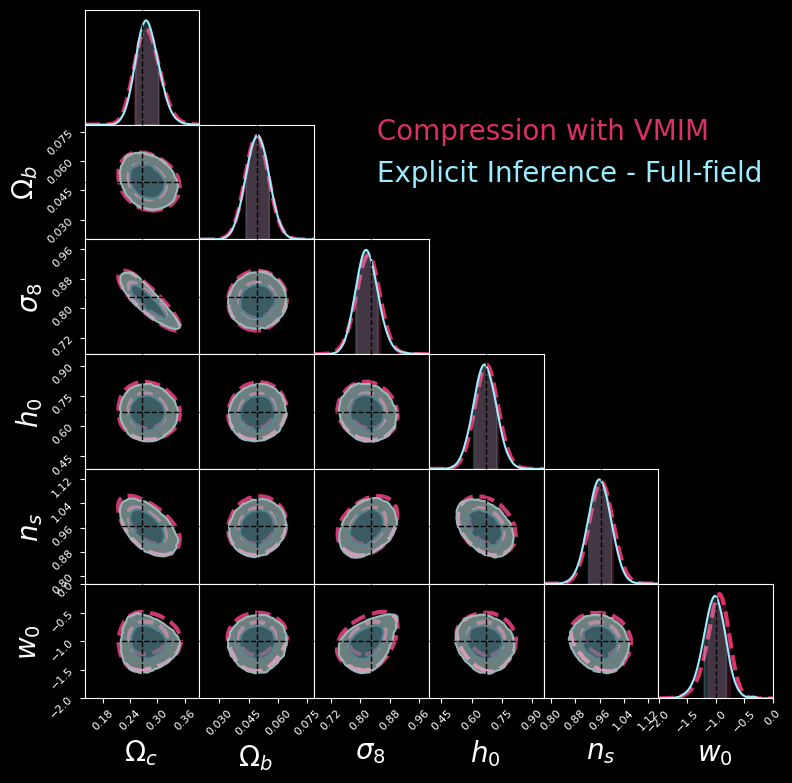

In [10]:
plt.style.use("dark_background")
c = ChainConsumer()


c.add_chain(
        sample_nd_vmim,
        parameters=params_name,
        name='\n \n \n Compression with VMIM',
        linewidth=3,
        color =  "#DE3163",
        shade = False,
        linestyle = '--'
)

c.add_chain(
        sample_ff,
        parameters=params_name,
        name=' Explicit Inference - Full-field',
        linewidth=1.5,
        color = "#9AECFF",
        shade_alpha = 0.5
)


c.configure(legend_kwargs={"fontsize": 20}, tick_font_size=8, label_font_size=20)
fig = c.plotter.plot(
    figsize=0.9,
    truth=truth,
    extents=[[t - 5 * np.std(sample_ff[:,i]),
              t + 5 * np.std(sample_ff[:,i])] for i,t in enumerate(truth)]
)

plt.savefig('contour_plot_compression2.png', transparent= True)